# Solving the ODE for outgoing radial null geodesics in Vaidya spacetime

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

The computations make use of tools developed through the [SageManifolds project](https://sagemanifolds.obspm.fr).

In [1]:
version()

'SageMath version 9.7.beta1, Release Date: 2022-05-26'

In [2]:
%display latex

In [3]:
x = var('x', domain='real')

In [4]:
a = var('a', latex_name=r'\alpha', domain='real')

In [5]:
f(x) = (1 - a*x) / (a*x^2 - x + 2)
f(x)

-(a*x - 1)/(a*x^2 - x + 2)

## Case of a high density radiation shell

In [6]:
assume(a > 1/8)

In [7]:
F(x) = integrate(f(x), x)
F(x)

arctan((2*a*x - 1)/sqrt(8*a - 1))/sqrt(8*a - 1) - 1/2*log(a*x^2 - x + 2)

In [8]:
P(x) = a*x^2 - x + 2

In [9]:
x1 = 1/(2*a)

In [10]:
P(x1)

-1/4/a + 2

In [11]:
F(x1)

-1/2*log(-1/4/a + 2)

In [12]:
exp(F(x1)).simplify_full()

2/sqrt((8*a - 1)/a)

In [13]:
P(1/a)

2

In [14]:
thb = -4*exp(-2/sqrt(16/x - 1)*atan(1/sqrt(16/x - 1)))
thb

-4*e^(-2*arctan(1/sqrt(16/x - 1))/sqrt(16/x - 1))

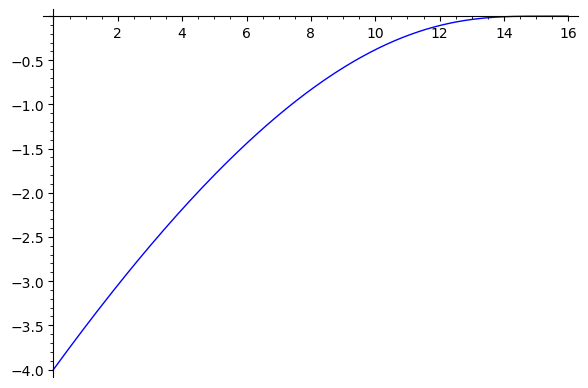

In [15]:
plot(thb, (x, 0.001, 15.99))

In [16]:
taylor(thb, x, 0, 3)

-1/3840*x^3 - 1/96*x^2 + 1/2*x - 4

In [17]:
x

x

In [18]:
f(a, x) = sqrt(2)/sqrt(a*x^2 - x + 2)*exp(1/sqrt(8*a - 1)*\
          (atan((2*a*x - 1)/sqrt(8*a - 1)) + atan(1/sqrt(8*a - 1))))
f

(a, x) |--> sqrt(2)*e^((arctan((2*a*x - 1)/sqrt(8*a - 1)) + arctan(1/sqrt(8*a - 1)))/sqrt(8*a - 1))/sqrt(a*x^2 - x + 2)

In [19]:
diff(f(a, x), x)

-1/2*sqrt(2)*(2*a*x - 1)*e^((arctan((2*a*x - 1)/sqrt(8*a - 1)) + arctan(1/sqrt(8*a - 1)))/sqrt(8*a - 1))/(a*x^2 - x + 2)^(3/2) + 2*sqrt(2)*a*e^((arctan((2*a*x - 1)/sqrt(8*a - 1)) + arctan(1/sqrt(8*a - 1)))/sqrt(8*a - 1))/(sqrt(a*x^2 - x + 2)*((2*a*x - 1)^2/(8*a - 1) + 1)*(8*a - 1))

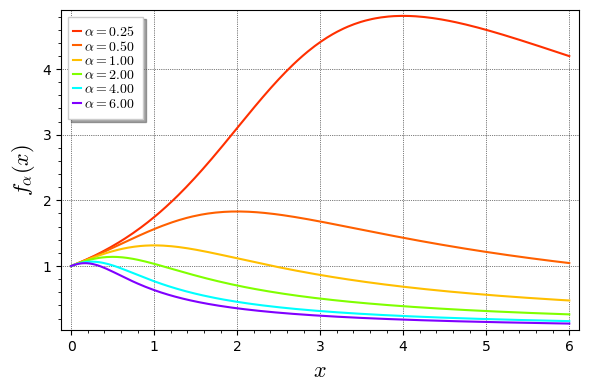

In [20]:
a_sel = [1/4, 1/2, 1, 2, 4, 6]
graph = Graphics()
for a1 in a_sel:
    legend_label=r'$\alpha = {:.2f}$'.format(float(a1))
    graph += plot(f(a1, x), (x, 0, 6), color=hue(a1/8), 
                  legend_label=legend_label, thickness=1.5,
                  axes_labels=[r"$x$", r"$f_\alpha(x)$"])
show(graph, frame=True, axes=False, gridlines=True)
graph.save("vai_f_alpha_x.pdf", frame=True, axes=False, gridlines=True)

Equivalent form:

In [21]:
h(a, x) = sqrt(2)/sqrt(a*x^2 - x + 2)*exp(1/sqrt(8*a - 1)*\
           (atan(x*sqrt(8*a - 1)/(4 - x)) + pi*heaviside(x-4)))
h

(a, x) |--> sqrt(2)*e^((pi*heaviside(x - 4) + arctan(-sqrt(8*a - 1)*x/(x - 4)))/sqrt(8*a - 1))/sqrt(a*x^2 - x + 2)

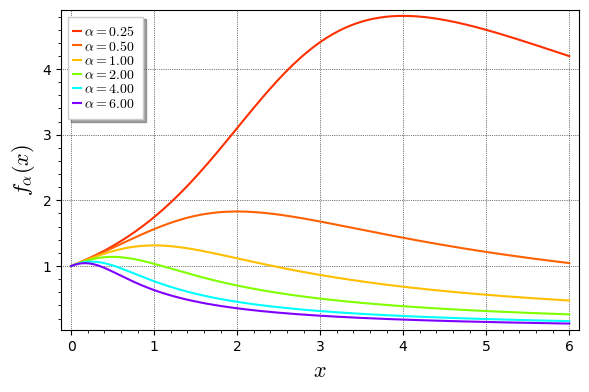

In [22]:
a_sel = [1/4, 1/2, 1, 2, 4, 6]
graph = Graphics()
for a1 in a_sel:
    legend_label=r'$\alpha = {:.2f}$'.format(float(a1))
    graph += plot(h(a1, x), (x, 0, 6), color=hue(a1/8), 
                  legend_label=legend_label, thickness=1.5,
                  axes_labels=[r"$x$", r"$f_\alpha(x)$"])
show(graph, frame=True, axes=False, gridlines=True)


Maximal value of $f_\alpha(x)$:

In [23]:
f(a, 1/a)

e^(2*arctan(1/sqrt(8*a - 1))/sqrt(8*a - 1))

## Case of a low density radiation shell

In [24]:
forget(a > 1/8)

In [25]:
assume(a < 1/8)

In [26]:
f(x) = (1 - a*x) / (a*x^2 - x + 2)
F(x) = integrate(f(x), x)
F(x)

1/2*log((2*a*x - sqrt(-8*a + 1) - 1)/(2*a*x + sqrt(-8*a + 1) - 1))/sqrt(-8*a + 1) - 1/2*log(a*x^2 - x + 2)

In [27]:
x01 = (1 - sqrt(1 - 8*a))/(2*a)
x02 = (1 + sqrt(1 - 8*a))/(2*a)
x01, x02

(-1/2*(sqrt(-8*a + 1) - 1)/a, 1/2*(sqrt(-8*a + 1) + 1)/a)

In [28]:
(x01 + x02).simplify_full()

1/a

In [29]:
bool(P(x) == a*(x - x01)*(x - x02))

True

In [30]:
x1 = var('x_1', domain='real')
x2 = var('x_2', domain='real')
a1 = 1/(x1 + x2)
a1

1/(x_1 + x_2)

In [31]:
f1(x) = (1 - a1*x) / (a1*(x - x1)*(x - x2))
f1(x)

-(x_1 + x_2)*(x/(x_1 + x_2) - 1)/((x - x_1)*(x - x_2))

In [32]:
integrate(f1(x), x).simplify_full()

(x_2*log(x - x_1) - x_1*log(x - x_2))/(x_1 - x_2)

In [33]:
(x01 - x02).simplify_full()

-sqrt(-8*a + 1)/a

In [34]:
g = x2/(x1 - x2)*ln(abs(x - x1)) - x1/(x1 - x2)*ln(abs(x - x2))
g

x_2*log(abs(x - x_1))/(x_1 - x_2) - x_1*log(abs(x - x_2))/(x_1 - x_2)

In [35]:
diff(g, x)

-x_1/((x - x_2)*(x_1 - x_2)) + x_2/((x - x_1)*(x_1 - x_2))

In [36]:
X1 = x01.subs(a=1/9).simplify_full()
X2 = x02.subs(a=1/9).simplify_full()
X1, X2

(3, 6)

In [37]:
n(X1), n(X2)

(3.00000000000000, 6.00000000000000)

In [38]:
b1 = (X1/(X2 - X1)).expand()
b2 = (X2/(X2 - X1)).expand()
b1, b2

(1, 2)

In [39]:
R(x) = abs(x - X2)^b1/abs(x - X1)^b2
R(x)

abs(x - 6)/(x - 3)^2

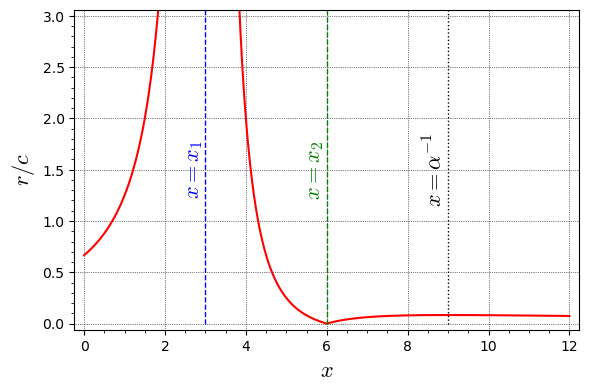

In [40]:
graph = plot(R(x), (x, 0, 2.6), thickness=1.5, color='red',
             axes_labels=[r"$x$", r"$r/c$"]) \
        + plot(R(x), (x, 2.9, 12), thickness=1.5, color='red')
graph += line([(X1, 0), (X1, 4)], color='blue', linestyle='dashed') \
         + text(r'$x=x_1$', (2.7, 1.5), fontsize=16, color='blue', rotation='vertical')
graph += line([(X2, 0), (X2, 4)], color='green', linestyle='dashed') \
         + text(r'$x=x_2$', (5.7, 1.5), fontsize=16, color='green', rotation='vertical')
graph += line([(X1 + X2, 0), (X1 + X2, 4)], color='black', linestyle='dotted') \
         + text(r'$x=\alpha^{-1}$', (8.7, 1.5), fontsize=16, color='black', rotation='vertical')
show(graph, ymax=3, frame=True, axes=False, gridlines=True)
graph.save('vai_r_x_naksing.pdf', ymax=3, frame=True, axes=False, gridlines=True)

In [41]:
f2(x) = 2 /(x*(a1*(x - x1)*(x - x2)))
f2(x)

2*(x_1 + x_2)/((x - x_1)*(x - x_2)*x)

In [42]:
s = integrate(f2(x), x).simplify_full()
s

2*(x_2^2*(log(x - x_1) - log(x)) - x_1^2*log(x - x_2) + x_1^2*log(x) + (x_1*log(x - x_1) - x_1*log(x - x_2))*x_2)/(x_1^2*x_2 - x_1*x_2^2)

In [43]:
s.coefficient(log(x - x1)).simplify_full()

2*(x_1 + x_2)/(x_1^2 - x_1*x_2)

In [44]:
s.coefficient(log(x - x2)).simplify_full()

-2*(x_1 + x_2)/(x_1*x_2 - x_2^2)

In [45]:
s.coefficient(log(x)).simplify_full()

2*(x_1 + x_2)/(x_1*x_2)

## Marginal case: $v_0 = 16 m$

In [46]:
f(x) = (8 - x)/(x - 4)^2
f(x)

-(x - 8)/(x - 4)^2

In [47]:
integrate(f(x), x)

-4/(x - 4) - log(x - 4)